In [2]:
import glacierml
import tensorflow as tf

In [3]:
print(tf.__version__)

2.8.0


# Step 0. Match the indices in RGI with those in GlaThiDa
This corresponds to the file ```workflow_step0_merge_training_data.py```. But note that this is can't really be run in a notebook because with ```useMP=True``` then note that multiprocessing doesn't play well with notebooks...

In [4]:
pth = '/data/fast1/glacierml/data/'
# output=glacierml.match_GlaThiDa_RGI_index(pth=pth, useMP=True);
# This writes the file to:  pth + '/v2/GlaThiDa_with_RGIId_v2.csv'

# Step 1. Build and train models.
This corresponds to the file ```workflow_step1_run_bootstrap_and_ensemble.py```.
Here, to illustrate the general ideas, we just build and train a single model rather than
going through the bootstrap/ensemble process.

First, load the training data,

In [9]:
dataset = glacierml.parameterize_data(parameterization = '5')
# parameterization, dataset, dataset.name, res = \
#     glacierml.select_dataset_coregistration(pth=pth)
dataset

,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Thickness
0,63.469173,-146.528168,12.0,722,1841,3081,5.457809,30,41911,235.0
1,63.281000,-145.427000,14.0,1162,1858,2438,2.866022,172,8639,147.0
2,58.380000,-134.349000,10.0,676,1123,1494,2.254235,327,6332,66.0
8,61.200000,-140.302000,14.0,2145,2509,2894,1.767979,341,3374,66.0
9,51.177000,-116.330000,15.3,2390,2526,2853,-0.136966,69,1181,70.0
...,...,...,...,...,...,...,...,...,...,...
486,-33.187500,-70.268900,29.7,3879,4371,4859,-0.536143,177,1747,23.0
489,-33.029600,-70.098400,29.0,2929,5121,5894,2.125370,358,8560,59.0
490,-30.145400,-69.927600,29.3,4664,5187,5525,0.173113,148,1596,28.0
491,-28.538700,-69.731800,16.0,4784,5234,5597,1.144223,190,3349,39.0


In [10]:
# dataset = dataset.drop('Zmed', axis = 1)

In [11]:
# import numpy as np
# dataset['Area'] = dataset['Area'] * 1e6
# dataset['Area'] = np.log(dataset['Area'])
# dataset['Lmax'] = np.log(dataset['Lmax'])

Then train a single NN model with the data:

In [30]:
# lr_input = 0.01
rs = 0
# ep_input = 2000
layer_1_input = 143
layer_2_input = 76
dropout = True
parameterization = '5'
dnn_model = glacierml.build_and_train_model(
                        dataset, 
#                         learning_rate = float(lr_input), 
#                         random_state = rs, 
#                         epochs = int(ep_input), 
                        parameterization = parameterization, 
#                         res = res,
                        layer_1 = layer_1_input,
                        layer_2 = layer_2_input,
                        dropout = dropout,
                        writeToFile = False
)   

In [31]:
model_thicknesses = glacierml.evaluate_model('10-5', rs, dataset, dnn_model, parameterization)
model_thicknesses

,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,model,test mae,train mae,layer architecture,parameterization,total parameters,GlaThiDa Thickness,E&L Thickness,Residual
0,46.851500,10.105400,17.7,2403,2910,3109,0.856116,13,2548,0,17.266306,15.806915,10-5,5,12470,44.0,39.489616,4.510384
1,44.591838,80.119691,20.3,3276,3637,3859,0.202941,356,1865,0,17.266306,15.806915,10-5,5,12470,33.0,43.492550,-10.492550
2,46.960300,9.388960,23.7,2589,2687,2778,-2.501036,56,285,0,17.266306,15.806915,10-5,5,12470,15.0,17.387594,-2.387594
3,44.776076,79.938517,15.2,3325,3564,3963,0.984323,354,2810,0,17.266306,15.806915,10-5,5,12470,47.0,49.193024,-2.193024
4,41.786813,77.749273,15.8,3921,4200,4458,-0.047092,11,2345,0,17.266306,15.806915,10-5,5,12470,34.0,45.748188,-11.748188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,43.784000,88.356000,24.7,3415,4233,5201,1.804676,172,7215,0,17.266306,15.806915,10-5,5,12470,58.0,50.318359,7.681641
336,-41.111000,-72.498700,32.6,1589,2067,2653,0.938052,189,1713,0,17.266306,15.806915,10-5,5,12470,17.0,26.111483,-9.111483
337,-39.426700,-71.912200,11.1,1584,2000,2835,2.572460,83,5447,0,17.266306,15.806915,10-5,5,12470,47.0,94.687393,-47.687393
338,-38.711200,-71.740500,14.4,1783,2167,3059,1.943765,237,3688,0,17.266306,15.806915,10-5,5,12470,16.0,68.206436,-52.206436


In [32]:
model_thicknesses['Residual'].mean()

1.2725293860715978

Text(0, 0.5, 'E&L Thickness')

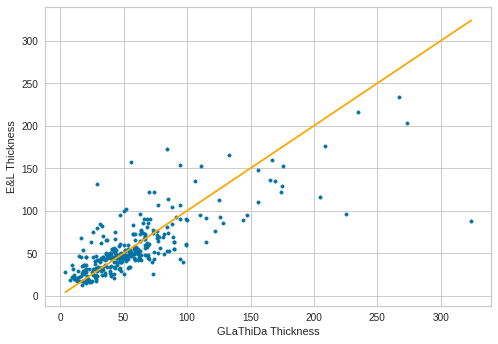

In [33]:
import matplotlib.pyplot as plt
plt.scatter(model_thicknesses['GlaThiDa Thickness'], model_thicknesses['E&L Thickness'],
           marker = '.')
plt.plot(
    (model_thicknesses['GlaThiDa Thickness'].min(),
    model_thicknesses['GlaThiDa Thickness'].max()),
    (model_thicknesses['GlaThiDa Thickness'].min(),
    model_thicknesses['GlaThiDa Thickness'].max()),
    color = 'orange'
)
plt.xlabel('GLaThiDa Thickness')
plt.ylabel('E&L Thickness')

In [11]:
model_statistics = glacierml.calculate_model_avg_statistics(
            dnn_model,
            '10-5',
            dataset,
            model_thicknesses
        )
model_statistics

,layer architecture,total parameters,trained parameters,total inputs,test mae avg,train mae avg,test mae std dev,train mae std dev
0,10-5,96.0,91.0,1000.0,31.696861,28.344343,0.0,0.0


In [12]:
RGI = glacierml.load_RGI()
# RGI = RGI.drop(['RGIId', 'region'], axis = 1)
RGI

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,region
0,RGI60-01.00001,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,01
1,RGI60-01.00002,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,01
2,RGI60-01.00003,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,01
3,RGI60-01.00004,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,01
4,RGI60-01.00005,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,01
...,...,...,...,...,...,...,...,...,...,...,...
216496,RGI60-19.02748,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,19
216497,RGI60-19.02749,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,19
216498,RGI60-19.02750,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,19
216499,RGI60-19.02751,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,19


In [13]:
# RGI['region'] = RGI['RGIId'].str[6:8]
for region_selection in range(1,20,1):
#     print(region_selection)
    
    
    
    if len(str(region_selection)) == 1:
        N = 1
        region_selection = str(region_selection).zfill(N + len(str(region_selection)))
    else:
        region_selection = region_selection

    
    RGI = RGI.reset_index()
    RGI = RGI.drop('index', axis=1)
#     if region_selection != '19':
    drops = RGI[
        ((RGI['region'] == str(region_selection)) & (RGI['Zmin'] < 0)) |
        ((RGI['region'] == str(region_selection)) & (RGI['Zmed'] < 0)) |
        ((RGI['region'] == str(region_selection)) & (RGI['Zmax'] < 0)) |
        ((RGI['region'] == str(region_selection)) & (RGI['Slope'] < 0)) |
        ((RGI['region'] == str(region_selection)) & (RGI['Aspect'] < 0))
    ].index
#         print(drops)
#         if not drops.empty:
#             print('dropping bad data')
    RGI = RGI.drop(drops)
RGI

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,region
0,RGI60-01.00001,63.6890,-146.823,42.0,1936,2385,2725,0.360,346,839,01
1,RGI60-01.00002,63.4040,-146.668,16.0,1713,2005,2144,0.558,162,1197,01
2,RGI60-01.00003,63.3760,-146.080,18.0,1609,1868,2182,1.685,175,2106,01
3,RGI60-01.00004,63.3810,-146.120,19.0,1273,1944,2317,3.681,195,4175,01
4,RGI60-01.00005,63.5510,-147.057,16.0,1494,1914,2317,2.573,181,2981,01
...,...,...,...,...,...,...,...,...,...,...,...
213702,RGI60-18.03533,-43.4215,170.354,34.7,1231,1724,2098,0.189,116,944,18
213703,RGI60-18.03534,-43.4550,170.349,36.1,1881,2106,2208,0.040,108,331,18
213704,RGI60-18.03535,-43.4400,170.351,39.2,1677,1974,2253,0.184,104,740,18
213705,RGI60-18.03536,-43.4106,170.364,34.0,1627,1839,1928,0.111,135,406,18


In [14]:
RGI = RGI.drop(['RGIId', 'region'], axis = 1)

In [15]:
RGI

,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax
0,63.6890,-146.823,42.0,1936,2385,2725,0.360,346,839
1,63.4040,-146.668,16.0,1713,2005,2144,0.558,162,1197
2,63.3760,-146.080,18.0,1609,1868,2182,1.685,175,2106
3,63.3810,-146.120,19.0,1273,1944,2317,3.681,195,4175
4,63.5510,-147.057,16.0,1494,1914,2317,2.573,181,2981
...,...,...,...,...,...,...,...,...,...
213702,-43.4215,170.354,34.7,1231,1724,2098,0.189,116,944
213703,-43.4550,170.349,36.1,1881,2106,2208,0.040,108,331
213704,-43.4400,170.351,39.2,1677,1974,2253,0.184,104,740
213705,-43.4106,170.364,34.0,1627,1839,1928,0.111,135,406


In [16]:
predictions = dnn_model.predict(RGI, verbose = 0)
predictions

ValueError: in user code:

    File "/home/sa42/.local/lib/python3.7/site-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/home/sa42/.local/lib/python3.7/site-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/sa42/.local/lib/python3.7/site-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/home/sa42/.local/lib/python3.7/site-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/home/sa42/.local/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "normalization_2" (type Normalization).
    
    Dimensions must be equal, but are 9 and 2 for '{{node sequential/normalization_2/sub}} = Sub[T=DT_FLOAT](sequential/Cast, sequential/normalization_2/sub/y)' with input shapes: [?,9], [1,2].
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 9), dtype=float32)


In [ ]:
df

In [ ]:
np.exp(df['Area'])/1e6

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Lmax'],df['Mean Thickness'])
plt.xlabel('Area')
plt.ylabel('Mean Thickness')